# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Fariz
- **Email:** mfarix730@gmail.com
- **ID Dicoding:** mfarzz

## Menentukan Pertanyaan Bisnis

- Produk apa yang memiliki penjualan paling banyak dan paling sedikit? Apakah harga barang menentukan banyak penjualan?
- Apa tipe pembayaran yang digunakan oleh pembeli?

*   Bagaimana pendapatan bulanan dari penjualan yang terjadi selama ini? Apakah pendapatan dari tahun ke tahun juga meningkat?


## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


In [2]:
import warnings # To suppress some warnings

# Suppress the specific FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning, module="seaborn")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
from unidecode import unidecode
import datetime as dt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

Customers Dataset

In [4]:
customers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Geolocation Dataset

In [5]:
geolocation = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/geolocation_dataset.csv')
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Order Items Dataset

In [6]:
order_items = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Order Payments Dataset

In [7]:
order_payments = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_payments_dataset.csv')
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Order Reviews Dataset

In [8]:
order_reviews = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/order_reviews_dataset.csv')
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Oders Dataset

In [9]:
orders = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Product Category Name Translation Dataset

In [10]:
product_catagory_name_translation = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/product_category_name_translation.csv')
product_catagory_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


Product Dataset

In [11]:
products = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/products_dataset.csv')
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Sellers Dataset

In [12]:
sellers = pd.read_csv('/content/drive/MyDrive/E-Commerce Public Dataset/sellers_dataset.csv')
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [13]:
data = {
    'customers': customers,
    'geolocation': geolocation,
    'order_items': order_items,
    'order_payments': order_payments,
    'order_reviews': order_reviews,
    'orders': orders,
    'product_catagory_name_translation': product_catagory_name_translation,
    'products': products,
    'sellers': sellers
}

**Insight:**
Memasukkan semua variabel tiap-tiap dataset ke dalam dictionary 'data' untuk mempermudah pengaksesan untuk tahap selanjutnya


### Assessing Data

Pada tahap Assessing Data kali ini akan dilakukan :
1. Pengecekan seluruh tipe data
2. Pengecekan missing value
3. Pengecekan duplicated data
4. Pengecekan deskripsi dataset



1. Pengecekan Seluruh Tipe Data

In [14]:
for dataset_name, dataset in data.items():
    print(f"\nDataset: {dataset_name}")
    dataset.info()


Dataset: customers
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB

Dataset: geolocation
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolo

2. Pengecekan Missing Value

In [15]:
#Melakukan pengecekan total nilai null untuk setiap dataset

print(f"{'Dataset':<40} {'Null':<15}")
print("=" * 55)
for dataset_name, dataset in data.items():
    total_null = dataset.isna().sum().sum()  # Menghitung total nilai null dalam seluruh dataset
    print(f"{dataset_name:<40} {total_null:<15}")

Dataset                                  Null           
customers                                0              
geolocation                              0              
order_items                              0              
order_payments                           0              
order_reviews                            145903         
orders                                   4908           
product_catagory_name_translation        0              
products                                 2448           
sellers                                  0              


In [16]:
#Dikarenakan terdapat nilai null pada tiap2 dateset, akan diperiksa nilai null pada tiap2 kolom dataset

for dataset_name, dataset in data.items():
    print(f"\n{dataset_name} Dataset Null Values:")
    print(f"{'Column':<40} {'Null':<15}")
    print("=" * 55)
    for column, null_count in dataset.isna().sum().items():
        print(f"{column:<40} {null_count:<15}")



customers Dataset Null Values:
Column                                   Null           
customer_id                              0              
customer_unique_id                       0              
customer_zip_code_prefix                 0              
customer_city                            0              
customer_state                           0              

geolocation Dataset Null Values:
Column                                   Null           
geolocation_zip_code_prefix              0              
geolocation_lat                          0              
geolocation_lng                          0              
geolocation_city                         0              
geolocation_state                        0              

order_items Dataset Null Values:
Column                                   Null           
order_id                                 0              
order_item_id                            0              
product_id                               0   

3. Pengecekan Data yang Duplikat

In [17]:
print(f"{'Dataset':<40} {'Duplicate Data':<15}")
print("=" * 55)
for dataset_name, dataset in data.items():
    print(f"{dataset_name:<40} {dataset.duplicated().sum():<15}")

Dataset                                  Duplicate Data 
customers                                0              
geolocation                              261831         
order_items                              0              
order_payments                           0              
order_reviews                            0              
orders                                   0              
product_catagory_name_translation        0              
products                                 0              
sellers                                  0              


4. Pengecekan Deskripsi Dataset

In [18]:
for key, df in data.items():
    print(f"Descriptive statistics for {key} dataset:")
    print(df.describe())
    print("\n" + "="*50 + "\n")


Descriptive statistics for customers dataset:
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000


Descriptive statistics for geolocation dataset:
       geolocation_zip_code_prefix  geolocation_lat  geolocation_lng
count                 1.000163e+06     1.000163e+06     1.000163e+06
mean                  3.657417e+04    -2.117615e+01    -4.639054e+01
std                   3.054934e+04     5.715866e+00     4.269748e+00
min                   1.001000e+03    -3.660537e+01    -1.014668e+02
25%                   1.107500e+04    -2.360355e+01    -4.857317e+01
50%                   2.653000e+04    -2.291938e+01    -4.663788e+01
75%                   6.350400e+04    -1.997962e+01    -4.376771e+01
max                   9.999000e+04     4.506593e+01     1.211054

Setelah dilakukan pengecekan dari informasi diatas didapat kesimpulan terdapat:
1. Tipe data yang tidak sesuai
2. Nilai yang duplikat
3. Nilai yang null

### Cleaning Data

Berdasarkan hasil dari assessing data sebelumnya maka diperlukan:
1. Melakukan konversi tipe data
2. Melakukan penghapusan data duplikat
3. Melakukan penanganan terhadap nilai null

1. Melakukan konversi tipe data dari bertipe objek menjadi datetime untuk kolom yang memiliki nilai berupa tanggal dan jam

    1.1 Dataset Orders Items

In [19]:
column_order_items_datetime = ['shipping_limit_date']
for column in column_order_items_datetime:
  data['order_items'][column] = pd.to_datetime(data['order_items'][column])
data['order_items'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


    1.2 Dataset Order Reviews

In [20]:
column_order_reviews_datetime = ['review_creation_date','review_answer_timestamp']
for column in column_order_reviews_datetime:
  data['order_reviews'][column] = pd.to_datetime(data['order_reviews'][column])
data['order_reviews'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


    1.3 Dataset Orders


In [21]:
column_orders_datetime = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']
for column in column_orders_datetime:
  data['orders'][column] = pd.to_datetime(data['orders'][column])
data['orders'].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


2. Menghapus Data Duplikat pada Dataset Geolocation

In [22]:
data['geolocation'].drop_duplicates(inplace=True)
data['geolocation'].duplicated().sum()

0

3. Penanganan Terhadap Nilai Null

Disini saya akan mengecek terlebih dahulu kolom yang berisikan nilai null untuk mempertimbangkan penanganan yang sesuai terhadap kolom tersebut

    3.1 Dataset Order Reviews

In [23]:
data['order_reviews']['review_comment_title'].value_counts(dropna=False)

,count
review_comment_title,
NaN,87656
Recomendo,423
recomendo,345
Bom,293
super recomendo,270
...,...
Luminaria sobrepor led 18,1
Não recebi.,1
produto com lacre violado,1


In [24]:
data['order_reviews']['review_comment_message'].value_counts(dropna=False)

,count
review_comment_message,
NaN,58247
Muito bom,230
Bom,189
muito bom,122
bom,107
...,...
"Devido incompatibilidade vou devolver, ótimo produto!",1
Infelizmente não! A qualidade do produto não agradou.Impressão da foto em exposição remete a um tamanho maior e a recebida sequer atende a uma criança. PRODUTO NÃO JUSTIFICA O VALOR INFELIZMENTE!,1
"entrega na data prevista,somente a qualidade do material não é o mesmo que eu pensava mas pelo preço ta valido",1


Setelah memperhatikan isi dari kolom review_comment_title dan review_comment_message juga value count nya yang isinya berupa review yang dimana ketika seseorang membeli sesuatu dia tidak wajib mengisikan review nya terhadap barang tersebut. Dengan demikian saya menyimpulkan bahwa untuk tidak melakukan drop melainkan menggantinya dengan nilai "Tidak Ada Judul" dan "Tidak Ada Pesan"

In [25]:
data['order_reviews']['review_comment_title'].fillna("Tidak Ada Judul", inplace=True)
data['order_reviews']['review_comment_message'].fillna("Tidak Ada Pesan", inplace=True)
data['order_reviews'].isna().sum()

<ipython-input-25-d9d63121eafd>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['order_reviews']['review_comment_title'].fillna("Tidak Ada Judul", inplace=True)
<ipython-input-25-d9d63121eafd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].m

,0
review_id,0
order_id,0
review_score,0
review_comment_title,0
review_comment_message,0
review_creation_date,0
review_answer_timestamp,0


    3.2 Dataset Orders

In [26]:
data['orders'].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23


In [27]:
data['orders'][data['orders'].isnull().any(axis=1)].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07
162,36530871a5e80138db53bcfd8a104d90,4dafe3c841d2d6cc8a8b6d25b35704b9,shipped,2017-05-09 11:48:37,2017-05-11 11:45:14,2017-05-11 13:21:47,NaT,2017-06-08
231,4d630f57194f5aba1a3d12ce23e71cd9,6d491c9fe2f04f6e2af6ec033cd8907c,shipped,2017-11-17 19:53:21,2017-11-18 19:50:31,2017-11-22 17:28:34,NaT,2017-12-13
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
299,3b4ad687e7e5190db827e1ae5a8989dd,1a87b8517b7d31373b50396eb15cb445,shipped,2018-06-28 12:52:15,2018-06-28 13:11:09,2018-07-04 15:20:00,NaT,2018-08-03
305,b68d69564a79dea4776afa33d1d2fcab,de1e5517fb50896bbdcff5814fb31802,shipped,2018-02-28 08:57:03,2018-02-28 10:40:35,2018-03-05 16:10:13,NaT,2018-03-23


In [28]:
print(data['orders']['order_status'].value_counts())

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64


In [29]:
delivered_orders = data['orders'][data['orders']['order_status'] == 'delivered']
delivered_orders.isnull().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,14
order_delivered_carrier_date,2
order_delivered_customer_date,8
order_estimated_delivery_date,0


In [30]:
delivered_orders[delivered_orders.isnull().any(axis=1)].head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaT,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaT,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaT,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,NaT,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,NaT,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,NaT,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,NaT,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,NaT,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22


Hasil analisa yang saya dapatkan yaitu nilai null yang terdapat pada dataset orders, yaitu:


*   Hampir seluruh nilai null disebabkan ketika order statusnya selain delivered yang berarti nilai null tersebut tidak akan saya lakukan drop untuk tidak menghilangkan keterangan yang penting
*   Untuk nilai null ketika orders statusnya delivered juga tidak akan saya lakukan drop karena bisa menghilangkan juga keterangan yang penting




    3.3 Dataset Products


In [31]:
data['products'].head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.0,745.0,1.0,200.0,38.0,5.0,11.0
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.0,1272.0,4.0,18350.0,70.0,24.0,44.0
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.0,184.0,2.0,900.0,40.0,8.0,40.0
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.0,163.0,1.0,400.0,27.0,13.0,17.0
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.0,1156.0,1.0,600.0,17.0,10.0,12.0


In [32]:
data['products'][data['products'].isnull().any(axis=1)].head(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
244,e10758160da97891c2fdcbc35f0f031d,NaN,NaN,NaN,NaN,2200.0,16.0,2.0,11.0
294,39e3b9b12cd0bf8ee681bbc1c130feb5,NaN,NaN,NaN,NaN,300.0,16.0,7.0,11.0
299,794de06c32a626a5692ff50e4985d36f,NaN,NaN,NaN,NaN,300.0,18.0,8.0,14.0
347,7af3e2da474486a3519b0cba9dea8ad9,NaN,NaN,NaN,NaN,200.0,22.0,14.0,14.0
428,629beb8e7317703dcc5f35b5463fd20e,NaN,NaN,NaN,NaN,1400.0,25.0,25.0,25.0


In [33]:
data['products']['product_photos_qty'].unique()

array([ 1.,  4.,  2.,  3.,  5.,  9.,  6., nan,  7., 12., 10., 11., 17.,
        8., 15., 13., 14., 20., 18., 19.])

Setelah melakukan analisis terhadap nilai null yang ada, saya putuskan untuk tidak melakukan drop karena saya tidak menemukan alasan untuk dilakukan drop dan juga bisa jadi ada keterangan data yang penting


## Exploratory Data Analysis (EDA)

### Explore Customers

In [34]:
data['customers'].head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Perlu mengetahui asal kota dari pelanggan mulai dari yang terbanyak hingga paling sedikit

In [35]:
data['customers'].groupby(by='customer_city')['customer_id'].nunique().sort_values(ascending=False)

,customer_id
customer_city,
sao paulo,15540
rio de janeiro,6882
belo horizonte,2773
brasilia,2131
curitiba,1521
...,...
ibiara,1
rio espera,1
rio dos indios,1


### Explore Geolocation

In [36]:
data['geolocation'].head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [37]:
data['geolocation'].sample(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
968275,95520,-29.895460,-50.280303,osorio,RS
399242,19280,-22.535767,-52.175403,teodoro sampaio,SP
699483,47800,-12.147511,-44.995222,barreiras,BA
875829,85620,-26.172095,-53.366523,salgado filho,PR
340170,14783,-20.566309,-48.567358,barretos,SP


Berdasarkan sampel data geolocation diatas terdapat beberapa nama kota yang memiliki simbol, untuk itu dilakukan pengecekan untuk nama kota yang memiliki simbol

In [38]:
pattern = r'[^a-zA-Z\s]'
cities_with_symbols = data['geolocation'][data['geolocation']['geolocation_city'].str.contains(pattern, regex=True, na=False)]
cities_with_symbols['geolocation_city'].value_counts()

,count
geolocation_city,
são paulo,19718
brasília,1872
são bernardo do campo,1183
santo andré,1026
goiânia,905
...,...
santo antônio do retiro,1
nova américa da colina,1
josé gonçalves de minas,1


In [39]:
sao_paulo_city = data['geolocation']['geolocation_city']=='sao paulo'
sao_paulo_city.sum()

79927

Berdasarkan hasil diatas maka perlu diperbaik format dari penulisan nama kota agar tidak memiliki simbol lagi

In [40]:
data['geolocation']['geolocation_city'] = data['geolocation']['geolocation_city'].apply(unidecode)

In [41]:
print(data['geolocation']['geolocation_city'].value_counts())

geolocation_city
sao paulo                  99645
rio de janeiro             35177
belo horizonte             19474
curitiba                   11263
brasilia                    8791
                           ...  
cachoeira de santa cruz        1
quixaba                        1
curumim                        1
xangrila                       1
bento fernandes                1
Name: count, Length: 5969, dtype: int64


Kemudian saya akan melakukan penghapusan data untuk mengambil hanya nilai unique dari kolom gelocation_state

In [42]:
data['geolocation'][['geolocation_state']].drop_duplicates()
data['geolocation'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 738332 entries, 0 to 1000161
Data columns (total 5 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   geolocation_zip_code_prefix  738332 non-null  int64  
 1   geolocation_lat              738332 non-null  float64
 2   geolocation_lng              738332 non-null  float64
 3   geolocation_city             738332 non-null  object 
 4   geolocation_state            738332 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 33.8+ MB


### Explore Payments

In [43]:
data['order_payments'].head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [44]:
data['order_payments'].groupby(by='payment_type')['order_id'].size().sort_values(ascending=False)

,order_id
payment_type,
credit_card,76795
boleto,19784
voucher,5775
debit_card,1529
not_defined,3


### Expolore Orders

In [45]:
data['orders'].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Merge Dataset Orders dengan Customers

In [46]:
customers_orders = pd.merge(
    left=data['customers'],
    right=data['orders'],
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
customers_orders.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


### Merge Dataset Produk dan Produk Kategori

In [47]:
products_product_category = pd.merge(
    left=data['products'],
    right=data['product_catagory_name_translation'],
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)
products_product_category.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


### Merge Dataset customers_orders dengan order_payments

In [48]:
customers_orders_payments = pd.merge(
    left=customers_orders,
    right=data['order_payments'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_orders_payments.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25


### Merge dataset customers_orders_payments dengan order_items

In [49]:
customers_orders_payments_items = pd.merge(
    left=customers_orders_payments,
    right=data['order_items'],
    how="left",
    left_on="order_id",
    right_on="order_id"
)
customers_orders_payments_items.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25


#### Merge Semua Data

In [50]:
pd.set_option('display.max_columns', None)

In [51]:
all_data = pd.merge(
    left=customers_orders_payments_items,
    right=products_product_category,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
all_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1.0,credit_card,2.0,146.87,1.0,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,moveis_escritorio,41.0,1141.0,1.0,8683.0,54.0,64.0,31.0,office_furniture
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1.0,credit_card,8.0,335.48,1.0,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,utilidades_domesticas,43.0,1002.0,3.0,10150.0,89.0,15.0,40.0,housewares
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1.0,credit_card,7.0,157.73,1.0,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,moveis_escritorio,55.0,955.0,1.0,8267.0,52.0,52.0,17.0,office_furniture
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1.0,credit_card,1.0,173.30,1.0,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,moveis_escritorio,48.0,1066.0,1.0,12160.0,56.0,51.0,28.0,office_furniture
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1.0,credit_card,8.0,252.25,1.0,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,casa_conforto,61.0,407.0,1.0,5200.0,45.0,15.0,35.0,home_confort


In [52]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118434 entries, 0 to 118433
Data columns (total 31 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    118434 non-null  object        
 1   customer_unique_id             118434 non-null  object        
 2   customer_zip_code_prefix       118434 non-null  int64         
 3   customer_city                  118434 non-null  object        
 4   customer_state                 118434 non-null  object        
 5   order_id                       118434 non-null  object        
 6   order_status                   118434 non-null  object        
 7   order_purchase_timestamp       118434 non-null  datetime64[ns]
 8   order_approved_at              118258 non-null  datetime64[ns]
 9   order_delivered_carrier_date   116360 non-null  datetime64[ns]
 10  order_delivered_customer_date  115037 non-null  datetime64[ns]
 11  

In [53]:
all_data.describe(include='all')

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
count,118434,118434,118434.000000,118434,118434,118434,118434,118434,118258,116360,115037,118434,118431.000000,118431,118431.000000,118431.000000,117604.000000,117604,117604,117604,117604.000000,117604.000000,115906,115906.000000,115906.000000,115906.000000,117584.000000,117584.000000,117584.00000,117584.000000,115881
unique,99441,96096,NaN,4119,27,99441,8,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,32951,3095,NaN,NaN,NaN,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71
top,270c23a11d024a44c896d1894b261a83,9a736b248f67d166d2fbb006bcb877c3,NaN,sao paulo,SP,895ab968e7bb0d5659d16cd74cd1650c,delivered,NaN,NaN,NaN,NaN,NaN,NaN,credit_card,NaN,NaN,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,4a3ca9315b744ce9f8e9374361493884,NaN,NaN,NaN,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bed_bath_table
freq,63,75,NaN,18738,49967,63,115038,NaN,NaN,NaN,NaN,NaN,NaN,87286,NaN,NaN,NaN,536,2133,NaN,NaN,NaN,11823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11823
mean,NaN,NaN,35034.264392,NaN,NaN,NaN,NaN,2017-12-30 04:00:24.559636224,2017-12-30 14:12:31.341397248,2018-01-03 17:52:23.945324544,2018-01-13 06:29:34.791693312,2018-01-23 00:31:38.941182464,1.094207,NaN,2.937398,172.849395,1.195920,NaN,NaN,2018-01-06 07:26:40.064649472,120.822849,20.045551,NaN,48.767208,786.957302,2.207849,2114.281067,30.256872,16.63029,23.068394,NaN
min,NaN,NaN,1003.000000,NaN,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00,1.000000,NaN,0.000000,0.000000,1.000000,NaN,NaN,2016-09-19 00:15:34,0.850000,0.000000,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.00000,6.000000,NaN
25%,NaN,NaN,11310.000000,NaN,NaN,NaN,NaN,2017-09-11 12:53:55.249999872,2017-09-11 22:45:23,2017-09-14 22:50:53.500000,2017-09-25 13:56:47,2017-10-02 00:00:00,1.000000,NaN,1.000000,60.860000,1.000000,NaN,NaN,2017-09-18 22:13:59.500000,39.900000,13.080000,NaN,42.000000,347.000000,1.000000,300.000000,18.000000,8.00000,15.000000,NaN
50%,NaN,NaN,24240.000000,NaN,NaN,NaN,NaN,2018-01-17 17:57:56.500000,2018-01-18 02:11:35,2018-01-23 20:43:19,2018-02-01 19:16:53,2018-02-14 00:00:00,1.000000,NaN,2.000000,108.200000,1.000000,NaN,NaN,2018-01-25 11:57:47.500000,74.900000,16.290000,NaN,52.000000,601.000000,1.000000,700.000000,25.000000,13.00000,20.000000,NaN
75%,NaN,NaN,58464.500000,NaN,NaN,NaN,NaN,2018-05-03 19:05:01,2018-05-04 02:51:40.249999872,2018-05-07 16:31:45,2018-05-15 16:51:55,2018-05-25 00:00:00,1.000000,NaN,4.000000,189.245000,1.000000,NaN,NaN,2018-05-10 07:50:37.249999872,134.900000,21.190000,NaN,57.000000,985.000000,3.000000,1800.000000,38.000000,20.00000,30.000000,NaN
max,NaN,NaN,99990.000000,NaN,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00,29.000000,NaN,24.000000,13664.080000,21.000000,NaN,NaN,2020-04-09 22:35:08,6735.000000,409.680000,NaN,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.00000,118.000000,NaN


In [54]:
all_data.groupby(by=['customer_city','product_category_name_english']).agg({'price':'sum'}).sort_values(by='price', ascending=False)

price
customer_city    product_category_name_english             
sao paulo        health_beauty                    195033.23
                 bed_bath_table                   180453.31
                 watches_gifts                    171630.08
                 sports_leisure                   152881.99
                 computers_accessories            146187.45
...                                                     ...
areal            pet_shop                              5.50
tupa             construction_tools_construction       3.99
palmeira d'oeste computers_accessories                 3.90
caldas novas     fashion_underwear_beach               3.90
hortolandia      construction_tools_construction       0.85

[25199 rows x 1 columns]

In [55]:
all_data.groupby(by=['payment_type']).size().reset_index(name='count').sort_values(by='count', ascending=False)

,payment_type,count
1,credit_card,87286
0,boleto,23037
4,voucher,6407
2,debit_card,1698
3,not_defined,3


#### RFM Analisis

In [56]:
all_data['order_purchase_timestamp'].max()

Timestamp('2018-10-17 17:30:18')

Karena tanggal terakhir transaksi yaitu 2018-10-17 maka saya akan mengatur tanggal untuk analisis adalah 2018-10-18

In [57]:
now =  dt.datetime(2018,10,18)

In [58]:
all_data['order_purchase_timestamp'] = pd.to_datetime(all_data['order_purchase_timestamp'])

In [59]:
rfm_data = all_data.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": lambda x: (now - x.max()).days,
    "order_id": 'count',
    "price": 'sum'
})

rfm_data.columns = ["customer_id", "recency", "frequency", "monetary"]

In [60]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  99441 non-null  object 
 1   recency      99441 non-null  int64  
 2   frequency    99441 non-null  int64  
 3   monetary     99441 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.0+ MB


In [61]:
rfm_data.sort_values(by = 'recency', ascending=False)

,customer_id,recency,frequency,monetary
3354,08c5351a6aca1c1589a38f244edeee9d,773,2,72.89
40289,683c54fc24d40ee9f8a6fc179fd9856c,772,1,59.50
38013,622e13439d6b5a0b486c435618b2679e,764,1,0.00
52277,86dc2ffce2dfff336de2f386a786e574,762,3,134.97
68946,b106b360fe2ef8849fbbd056f777b4d5,745,1,100.00
...,...,...,...,...
15595,2823ffda607a2316375088e0d00005ec,18,1,0.00
74611,bf6181a85bbb4115736c0a8db1a53be3,16,1,0.00
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,14,1,0.00
51713,856336203359aa6a61bf3826f7d84c49,1,1,0.00


In [62]:
rfm_data.sort_values(by = 'monetary', ascending=False)

,customer_id,recency,frequency,monetary
8546,1617b1357756262bfa56ab541c47bc16,383,8,13440.00
60184,9af2372a1e49340278e7c1ef8d749f34,545,29,11383.95
86603,de832e8dbb1f588a47013e53feaa67cc,506,15,10856.10
38590,63b964e79dee32a3587651701a2b8dbf,245,24,9888.00
43009,6f241d5bbb142b6f764387c8c270645a,160,7,9520.14
...,...,...,...,...
55976,905bd3fd513ac50ea6c8fa9dbedb9ca1,246,1,0.00
49641,7fea47e002bbb5ec01948f7622d4630a,329,1,0.00
74847,bffd28b4af20bc7b1a477fe80e190c77,591,1,0.00
3761,09cb79df62a7ca61507fca903adfe410,348,1,0.00


In [63]:
rfm_data.sort_values(by = 'frequency', ascending=False)

,customer_id,recency,frequency,monetary
15183,270c23a11d024a44c896d1894b261a83,435,63,2305.38
7586,13aa59158da63ba0e93ec6ac2c07aacb,389,38,3039.62
60184,9af2372a1e49340278e7c1ef8d749f34,545,29,11383.95
56942,92cd3ec6e2d643d4ebd0e3d6238f69e2,497,26,1299.74
38590,63b964e79dee32a3587651701a2b8dbf,245,24,9888.00
...,...,...,...,...
35357,5b5f98e66538647d1a5ca7826d8cb1c9,225,1,110.00
35356,5b5f4957a69d537a2aeadfa7dd2d09d9,481,1,135.90
35355,5b5ce8d7a82bbea2c5eef3d3bf4facf1,578,1,119.99
35354,5b5c91974946b908c9a238efa39710e3,535,1,339.99


## Visualization & Explanatory Analysis

### Pertanyaan 1: Produk apa yang memiliki penjualan paling banyak dan paling sedikit? Apakah harga barang menentukan banyak penjualan?

In [64]:
products_count = all_data.groupby('product_category_name_english')['product_id'].count().reset_index()
products_count.sort_values(by='product_id', ascending=False)

,product_category_name_english,product_id
7,bed_bath_table,11823
43,health_beauty,9975
65,sports_leisure,8945
39,furniture_decor,8744
15,computers_accessories,8082
...,...,...
3,arts_and_craftmanship,24
52,la_cuisine,16
11,cds_dvds_musicals,14
29,fashion_childrens_clothes,8


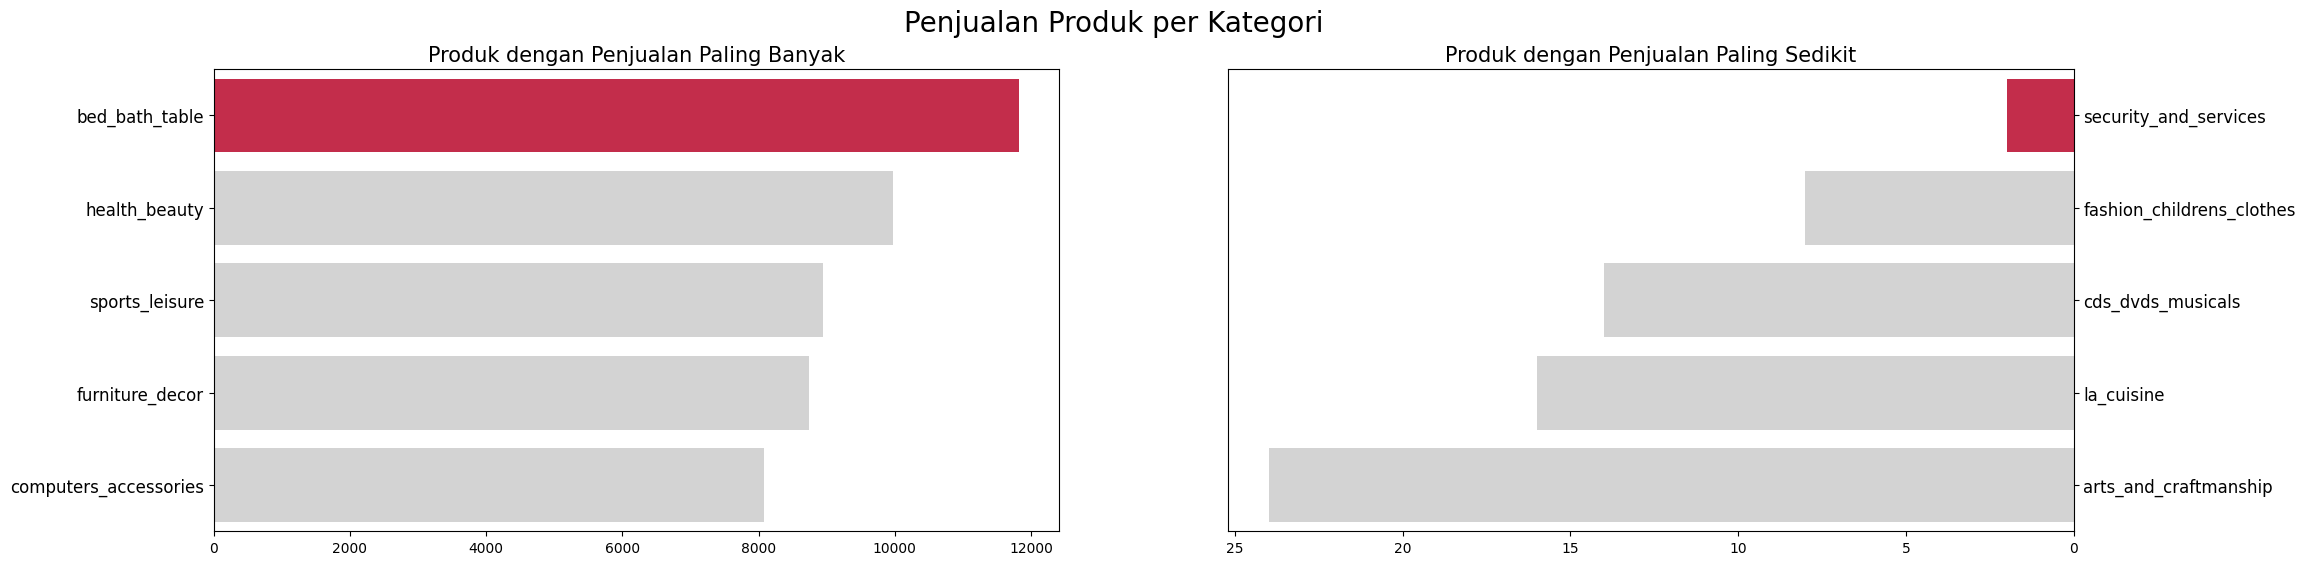

In [65]:
product_count_sort = products_count.sort_values(by='product_id', ascending=False)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(24, 6))

colors = ["crimson"] + ["#D3D3D3"] * 4

sns.barplot(x="product_id", y="product_category_name_english",
            data=product_count_sort.head(5),
            palette=colors,
            hue='product_category_name_english',
            ax=ax[0],
            legend=False)
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Produk dengan Penjualan Paling Banyak", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(x="product_id", y="product_category_name_english",
            data=product_count_sort.sort_values(by="product_id", ascending=True).head(5),
            palette=colors,
            hue='product_category_name_english',
            ax=ax[1],
            legend=False)
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].set_title("Produk dengan Penjualan Paling Sedikit", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle("Penjualan Produk per Kategori", fontsize=20)
plt.show()


Untuk melihat apakah penjualan produk dipengaruhi oleh harga produk menggunakan heatmap dan melihat distribusinya menggunakan scatter plot

In [66]:
product_sales = all_data.groupby('product_id').agg({
    'order_item_id': 'count',
    'price': 'mean',
    'product_category_name_english': 'first',
    'freight_value': 'mean'
}).reset_index()

product_sales.columns = ['product_id', 'total_sales', 'avg_price', 'category', 'avg_freight']

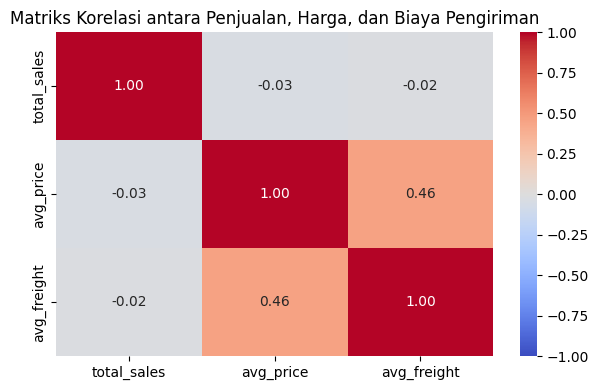

In [67]:
plt.figure(figsize=(6, 4))
correlation_matrix = product_sales[['total_sales', 'avg_price', 'avg_freight']].corr()

# Membuat heatmap
sns.heatmap(correlation_matrix,
            annot=True,  # Menampilkan nilai korelasi
            cmap='coolwarm',  # Colormap: merah untuk positif, biru untuk negatif
            vmin=-1, vmax=1,  # Range nilai
            center=0,  # Nilai tengah colormap
            fmt='.2f')  # Format angka dengan 2 desimal

plt.title('Matriks Korelasi antara Penjualan, Harga, dan Biaya Pengiriman')
plt.tight_layout()
plt.show()

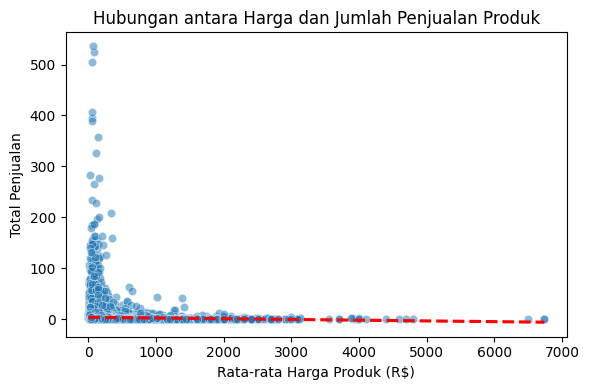

In [68]:
plt.figure(figsize=(6, 4))

# Menghitung korelasi
correlation = product_sales['avg_price'].corr(product_sales['total_sales'])

# Membuat scatter plot
sns.scatterplot(data=product_sales,
                x='avg_price',
                y='total_sales',
                alpha=0.5)

# Menambahkan garis trend
sns.regplot(data=product_sales,
            x='avg_price',
            y='total_sales',
            scatter=False,
            color='red',
            line_kws={'linestyle': '--'})

plt.title('Hubungan antara Harga dan Jumlah Penjualan Produk')
plt.xlabel('Rata-rata Harga Produk (R$)')
plt.ylabel('Total Penjualan')

plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa tipe pembayaran yang digunakan oleh pembeli?

In [69]:
payment_counts = all_data['payment_type'].value_counts().reset_index()
payment_counts.columns = ['payment_type', 'count']
payment_counts

,payment_type,count
0,credit_card,87286
1,boleto,23037
2,voucher,6407
3,debit_card,1698
4,not_defined,3


<ipython-input-70-6e2afebec7b7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="payment_type", y="count",


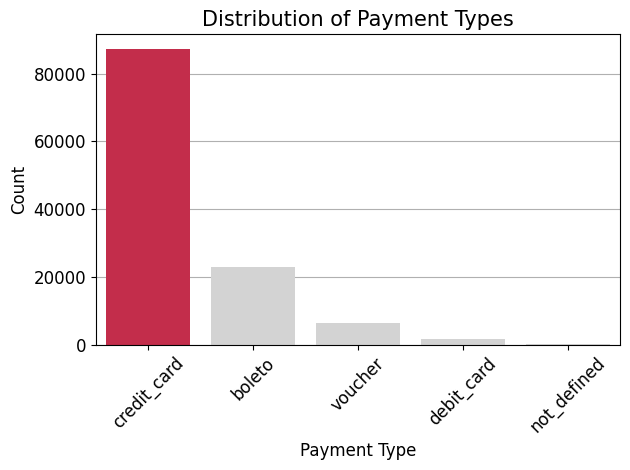

In [70]:
fig, ax = plt.subplots()
colors = ["crimson"] + ["#D3D3D3"] * 4

# Membuat barplot
sns.barplot(x="payment_type", y="count",
            data=payment_counts,
            ax=ax,
            palette=colors)

# Menyesuaikan label dan judul
ax.set_ylabel("Count", fontsize=12)
ax.set_xlabel("Payment Type", fontsize=12)
ax.set_title("Distribution of Payment Types", loc="center", fontsize=15)
ax.tick_params(axis='x', labelsize=12, rotation=45)
ax.tick_params(axis='y', labelsize=12)
ax.grid(True, axis = 'y')
ax.set_axisbelow(True)

# Menampilkan plot
plt.tight_layout()
plt.show()

### Pertanyaan 3 : Bagaimana pendapatan bulanan dari penjualan yang terjadi selama ini? Apakah pendapatan dari tahun ke tahun juga meningkat?


In [71]:
sales_per_month = all_data.groupby(all_data['order_purchase_timestamp'].dt.to_period('M'))['payment_value'].sum()
sales_per_month

,payment_value
order_purchase_timestamp,
2016-09,388.47
2016-10,76120.17
2016-12,19.62
2017-01,189015.66
2017-02,349701.93
2017-03,544738.23
2017-04,510891.55
2017-05,731017.09
2017-06,608891.38


Mengubah nilai pada order purchase agar berformat [Nama Bulan] [Tahun] dan dimasukkan ke kolom baru yaitu month_purchase

In [72]:
all_data['month_purchase'] = all_data['order_purchase_timestamp'].dt.strftime('%B %Y')

sales_per_month_new = all_data.groupby('month_purchase')['payment_value'].sum()
sales_per_month_new = sales_per_month_new.sort_index(key=lambda x: pd.to_datetime(x, format='%B %Y'))
sales_per_month_new

,payment_value
month_purchase,
September 2016,388.47
October 2016,76120.17
December 2016,19.62
January 2017,189015.66
February 2017,349701.93
March 2017,544738.23
April 2017,510891.55
May 2017,731017.09
June 2017,608891.38


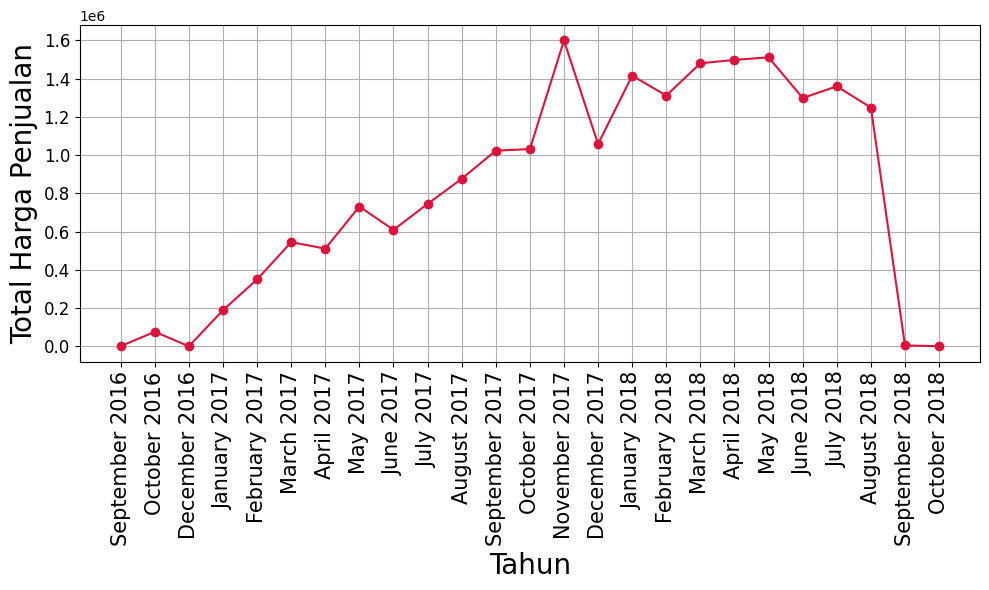

In [73]:
fig, ax = plt.subplots( figsize=(10, 6))

ax.plot(
    sales_per_month_new.index,
    sales_per_month_new,
    color='crimson',
    marker='o'
  )

ax.set_xlabel('Tahun', fontsize=20)
ax.set_ylabel('Total Harga Penjualan', fontsize=20)
ax.grid()
ax.tick_params(axis='x', rotation=90, labelsize=15)
ax.tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

In [74]:
sales_per_year = all_data.groupby(all_data['order_purchase_timestamp'].dt.to_period('Y')).agg(
    total_payment_value=('payment_value', 'sum'),
    year=('order_purchase_timestamp', lambda x: x.unique()[0].year)
)
sales_per_year.reset_index(inplace=True)
sales_per_year

,order_purchase_timestamp,total_payment_value,year
0,2016,76528.26,2016
1,2017,9266612.28,2017
2,2018,11127586.12,2018


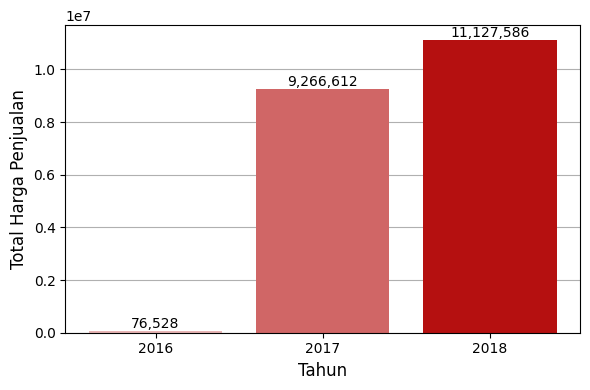

In [83]:
fig, ax = plt.subplots(figsize=(6, 4))
colors = ["#e8b5b5"] + ['#d06666'] + ["#b51010"]

bar_container = ax.bar(
    sales_per_year['year'].astype(str),
    sales_per_year['total_payment_value'],
    color=colors,
)

ax.set_xlabel('Tahun', fontsize=12)
ax.set_ylabel('Total Harga Penjualan', fontsize=12)
ax.grid(axis='y')
ax.set_axisbelow(True)
ax.bar_label(bar_container, fmt='{:,.0f}', fontsize=10)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)

plt.tight_layout()
plt.show()

#### RFM


Melakukkan mapping agar customer id mempunyai karakter yang lebih sedikit dan dapat ditampilkan pada visualisasi

In [76]:
customer_mapping = {id_: str(index) for index, id_ in enumerate(rfm_data['customer_id'].unique())}

# Map customer_id to customer_id_new as strings
rfm_data['customer_id_new'] = rfm_data['customer_id'].map(customer_mapping)

In [77]:
rfm_data.sort_values(by = 'recency', ascending=True)

,customer_id,recency,frequency,monetary,customer_id_new
63970,a4b417188addbc05b26b72d5e44837a1,0,1,0.00,63970
51713,856336203359aa6a61bf3826f7d84c49,1,1,0.00,51713
29531,4c2ec60c29d10c34bd49cb88aa85cfc4,14,1,0.00,29531
74611,bf6181a85bbb4115736c0a8db1a53be3,16,1,0.00,74611
15595,2823ffda607a2316375088e0d00005ec,18,1,0.00,15595
...,...,...,...,...,...
68946,b106b360fe2ef8849fbbd056f777b4d5,745,1,100.00,68946
52277,86dc2ffce2dfff336de2f386a786e574,762,3,134.97,52277
38013,622e13439d6b5a0b486c435618b2679e,764,1,0.00,38013
40289,683c54fc24d40ee9f8a6fc179fd9856c,772,1,59.50,40289


In [78]:
rfm_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      99441 non-null  object 
 1   recency          99441 non-null  int64  
 2   frequency        99441 non-null  int64  
 3   monetary         99441 non-null  float64
 4   customer_id_new  99441 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


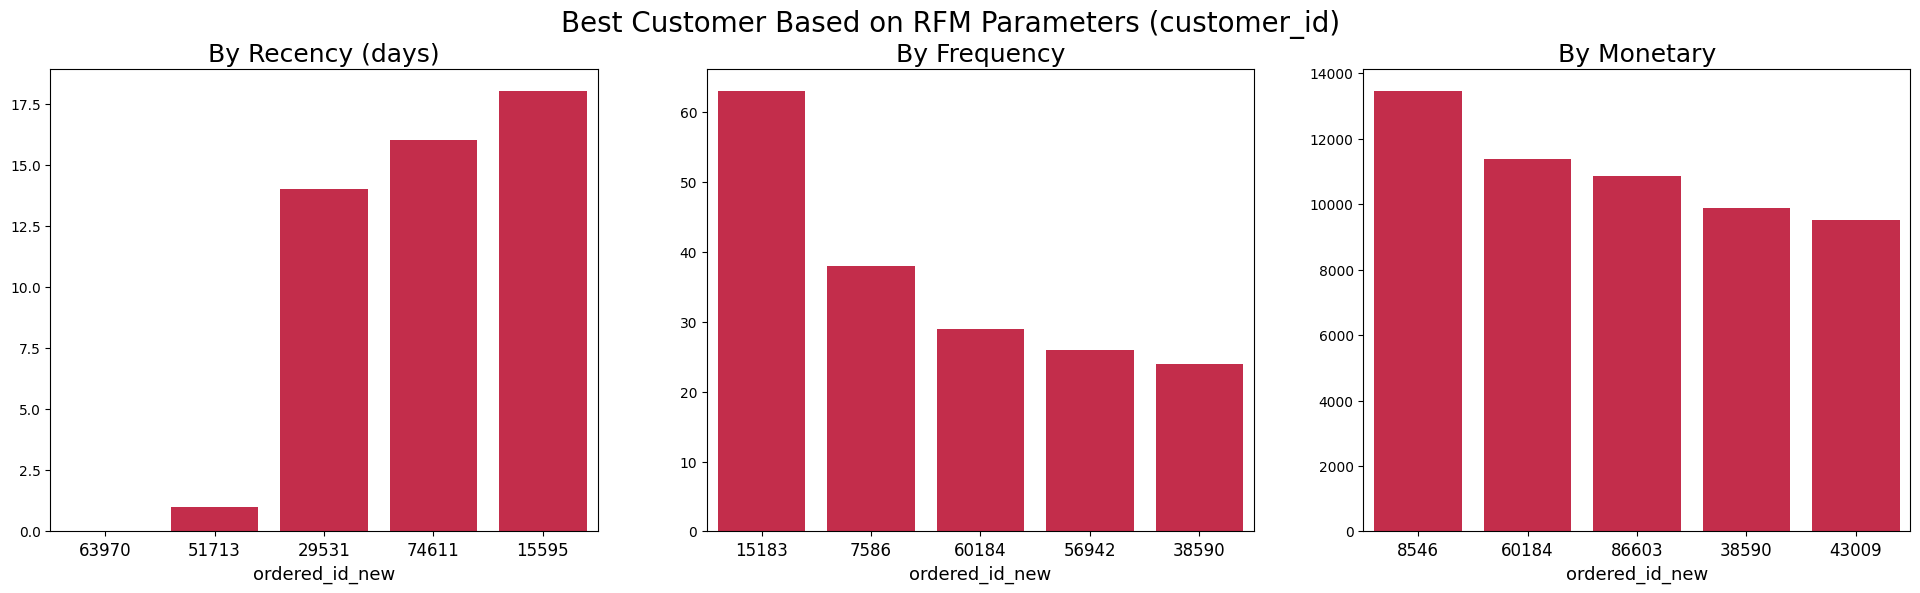

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

color = "crimson"

# By Recency
recency_sorted = rfm_data.sort_values(by="recency", ascending=True).head(5)
sns.barplot(y="recency", x="customer_id_new", data=recency_sorted, color=color, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('ordered_id_new', fontsize=13)
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis='x', labelsize=12)

# By Frequency
frequency_sorted = rfm_data.sort_values(by="frequency", ascending=False).head(5)
sns.barplot(y="frequency", x="customer_id_new", data=frequency_sorted, color=color, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('ordered_id_new', fontsize=13)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=12)

# By Monetary
monetary_sorted = rfm_data.sort_values(by="monetary", ascending=False).head(5)
sns.barplot(y="monetary", x="customer_id_new", data=monetary_sorted, color=color, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('ordered_id_new', fontsize=13)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=12)

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()

## Conclusion

1. Produk apa yang memiliki penjualan paling banyak dan paling sedikit? Apakah harga barang menentukan banyak penjualan?
2. Apa tipe pembayaran yang digunakan oleh pembeli?
3. Bagaimana pendapatan bulanan dari penjualan yang terjadi selama ini? Apakah pendapatan dari tahun ke tahun juga meningkat?


Jawaban

1. Berdasarkan visualisasi bar chart yang ditampilkan dapat disimpulkan produk dengan penjualan yang paling banyak adalah bed_bath_table dan produk yang paling sedikit penjualan adalah security_and_service. Kemudian dari heatmap dan scatter plot yang ditampilkan menunjukkan bahwa harga produk tidak mempengaruhi banyaknya produk itu terjual, hanya sebesar -0.03 persen hubungan antara pengaruh harga terhadap penjualan

2. Berdasarkan grafik dapat dilihat bahwa terdapat 4 metode pembayaran yang digunakan mulai dari yang paling banyak digunakan yaitu, kredit card, boleto, voucher, dan debit card. Kemudian terdapat data metode pembayaran yang tidak diketahui

3. Berdasarkan grafik garis yang ditampilkan dapat disimpulkan bahwa total penjualan per bulan itu fluaktif dan cenderung meningkat hingga pada Oktober 2017 merupakan total penjualan paling tinggi. Kemudian terjadi penurunan yang signifikan dari bulan Juli 2018 hingga Agustus 2018. Dapat diperkirakan pada bulan selanjutnya total penjualan lebih sulit untuk meningkat

Pada visualisai RFM dapat dilihat pada visualisai By Recency menunjukan transaksi customer dalam satu hari yang paling sedikit. Pada By Frekuensi menunjukan banyak transaksi yang dilakukan oleh customer seluruh periode yang diurutkan dari paling banyak. Pada By Monetery menunjukkan total pengeluaran customer pada transaksi selama seluruh periode